## Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Set style for plots

In [108]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Helvetica" 
matplotlib.rcParams['font.family'] = 'font.sans-serif'
matplotlib.rcParams['font.size'] = 12

## Import dataframes

In [109]:
df_all_items = pd.read_csv('data/df_all_items.csv')
df_all_questions = pd.read_csv('data/df_all_questions.csv')
df_all_feedback = pd.read_csv('data/df_all_feedback.csv')
df_all_visits = pd.read_csv('data/df_all_visits.csv')

In [110]:
df_all_items.head(2)

,id,site_id,title,seller,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,seller_address,attributes,differential_pricing,original_price,category_id,official_store_id,catalog_product_id,tags,index_character,smaller_title
0,MLA817802367,MLA,Chocolate Banco De Alimentos - Prod Virtual D...,"{'id': 467409779, 'permalink': 'http://perfil....",127,ARS,5000,5,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'id': 'BRAND', 'name': 'Marca', 'value_name'...",{'id': 33678187},NaN,MLA376491,1871,NaN,"['brand_verified', 'good_quality_picture', 'in...",10,Chocolate
1,MLA817793200,MLA,Agua Banco De Alimentos- Productos Virtuales D...,"{'id': 467409779, 'permalink': 'http://perfil....",76,ARS,500,50,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'attribute_group_id': 'OTHERS', 'source': 83...",{'id': 33678187},NaN,MLA418070,1871,NaN,"['brand_verified', 'good_quality_picture', 'go...",4,Agua


## Descriptive

In [112]:
total_items = df_all_items['id'].nunique()
print(f'Total items published = {total_items}')
total_sold_quantity = df_all_items['sold_quantity'].sum()
print(f'Sold quantity = {total_sold_quantity}')
df_all_items['total'] = df_all_items['price'] * df_all_items['sold_quantity']
total_amount = df_all_items['total'].sum()
print(f'Total amount(ARS) = {total_amount}')

Total items published = 22
Sold quantity = 292
Total amount(ARS) = 89646


## Plots

No handles with labels found to put in legend.


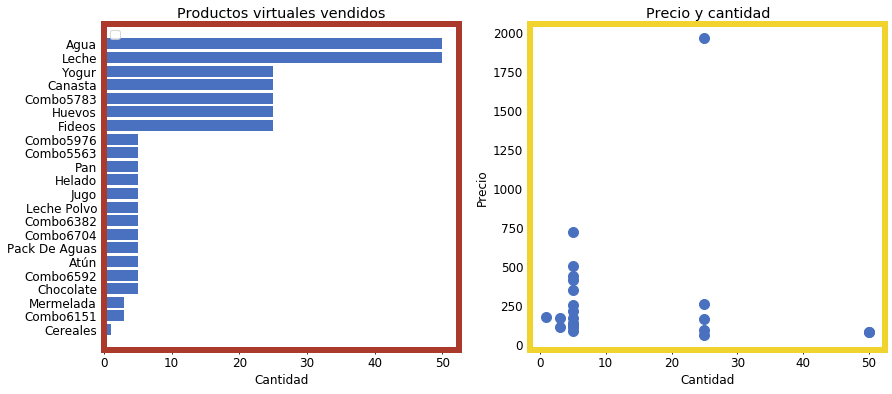

In [122]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                            figsize=(14,6))

# Bar
df_all_items = df_all_items.sort_values(by = 'sold_quantity')
ax1.barh(df_all_items['smaller_title'], df_all_items['sold_quantity'], color = '#4A71C0')
ax1.set_title('Productos virtuales vendidos')
ax1.legend(loc='upper left')
ax1.set_xlabel('Cantidad')
# Spines
ax1.spines['bottom'].set_color('#AB3A2C')
ax1.spines['top'].set_color('#AB3A2C')
ax1.spines['right'].set_color('#AB3A2C')
ax1.spines['left'].set_color('#AB3A2C')
ax1.spines['bottom'].set_linewidth(6)
ax1.spines['top'].set_linewidth(6)
ax1.spines['right'].set_linewidth(6)
ax1.spines['left'].set_linewidth(6)

# Scatter 
# Adding en axes (stackplot)
ax2.scatter(df_all_items['sold_quantity'], df_all_items['price'], 
            color = '#4A71C0',
            s = 100)
ax2.set_title('Precio y cantidad')
#ax.legend(loc='upper left')
ax2.set_ylabel('Precio')
ax2.set_xlabel('Cantidad')

# Spines
ax2.spines['bottom'].set_color('#F0D32D')
ax2.spines['top'].set_color('#F0D32D')
ax2.spines['right'].set_color('#F0D32D')
ax2.spines['left'].set_color('#F0D32D')
ax2.spines['bottom'].set_linewidth(6)
ax2.spines['top'].set_linewidth(6)
ax2.spines['right'].set_linewidth(6)
ax2.spines['left'].set_linewidth(6)

# Plot
fig.tight_layout # clean up whitespaces
# Save plot
plt.savefig('plots/price_quantity.png')
# Show
plt.show()

### Visits

In [115]:
# Sum all visits per day
df_all_visits['total'] = df_all_visits.sum(axis = 1, skipna = True) 
first_day_with_visits = df_all_visits.loc[df_all_visits['total'] > 0].sort_values(by='total').head(1)['date']
print(f'First day with visits = {first_day_with_visits}')
total_vists = df_all_visits['total'].sum()
print(f'Total visits = {total_vists}')

First day with visits = 5    2019-09-17
Name: date, dtype: object
Total visits = 38845.0


In [82]:
pd.datetime.today() - datetime.strptime('2019-09-17', '%Y-%m-%d')

datetime.timedelta(days=85, seconds=39843, microseconds=474628)

No handles with labels found to put in legend.


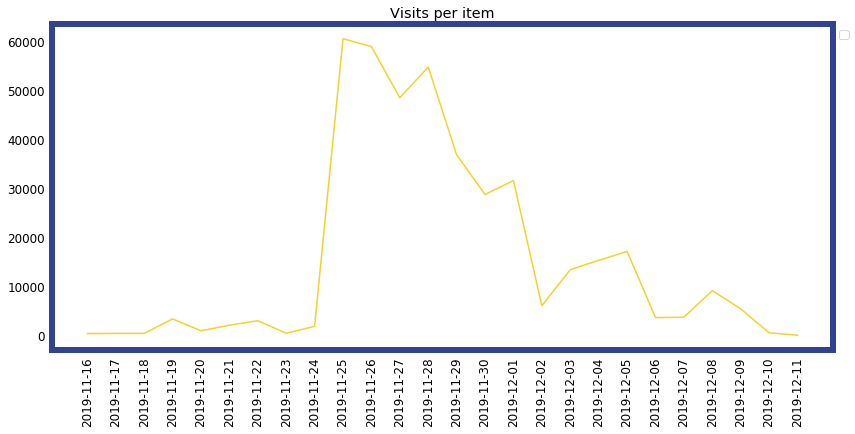

In [90]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,
                            figsize=(14,6))

ax1.plot(df_all_visits['date'], df_all_visits['total'], color = '#F0D32D')
ax1.tick_params(axis='x', rotation=90)
    
    # Spines
ax1.spines['bottom'].set_color('#314290')
ax1.spines['top'].set_color('#314290')
ax1.spines['right'].set_color('#314290')
ax1.spines['left'].set_color('#314290')
ax1.spines['bottom'].set_linewidth(6)
ax1.spines['top'].set_linewidth(6)
ax1.spines['right'].set_linewidth(6)
ax1.spines['left'].set_linewidth(6)

ax1.set_title('Visits per item')

plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
plt.tick_params(bottom = False)
fig.tight_layout # clean up whitespaces
plt.show()

In [120]:
df_all_visits = df_all_visits.loc[df_all_visits['date'] > '2019-11-15']
items = df_all_visits.columns

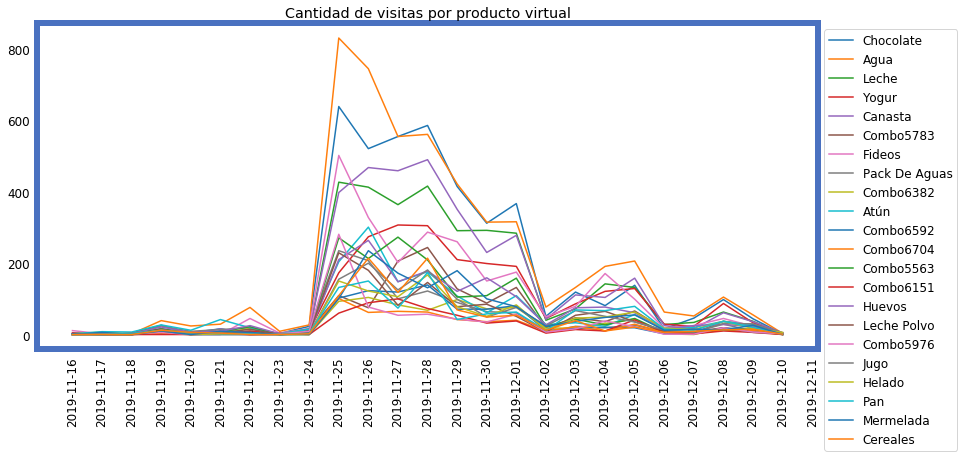

In [123]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,
                            figsize=(14,6))

for item in items[1:len(items) - 1]:
    ax1.plot(df_all_visits['date'], df_all_visits[item], label = item)
    ax1.tick_params(axis='x', rotation=90)
    
    # Spines
ax1.spines['bottom'].set_color('#4A71C0')
ax1.spines['top'].set_color('#4A71C0')
ax1.spines['right'].set_color('#4A71C0')
ax1.spines['left'].set_color('#4A71C0')
ax1.spines['bottom'].set_linewidth(6)
ax1.spines['top'].set_linewidth(6)
ax1.spines['right'].set_linewidth(6)
ax1.spines['left'].set_linewidth(6)

ax1.set_title('Cantidad de visitas por producto virtual')

plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
plt.tick_params(bottom = False)
fig.tight_layout # clean up whitespaces
# Save plot
plt.savefig('plots/visits.png',bbox_inches = 'tight')
plt.show()


### Questions

In [15]:
df_all_questions.head()

,date_created,item_id,seller_id,status,text,answer,smaller_title
0,2019-12-05T19:44:22.000-04:00,MLA817802367,467409779,ANSWERED,Hola buenos días me llamo Juan Armua. Soy ven...,"{'text': '¡Hola! Los productos ""Banco de Alime...",Chocolate
1,2019-11-29T14:41:53.000-04:00,MLA817802367,467409779,ANSWERED,Cuáles son los medios de pago?,{'text': '¡Buenas tardes Marina! Los medios de...,Chocolate
2,2019-12-05T07:06:39.000-04:00,MLA817793200,467409779,ANSWERED,Hola les envié un mensaje y todavía no me resp...,"{'text': '¡Hola! Los productos ""Banco de Alime...",Agua
3,2019-12-05T09:10:56.000-04:00,MLA817793200,467409779,ANSWERED,"¿ONG Mercado libre solidario""? .. pero ellos t...",{'text': 'Hola! gracias por escribirnos! Merca...,Agua
4,2019-11-29T16:25:08.000-04:00,MLA817793200,467409779,ANSWERED,Espero que esto sirva. Voy a confiar. ¿,{'text': 'Hola! ¡Gracias por escribirnos! Somo...,Agua


In [16]:
df_all_questions.groupby('smaller_title').count().sort_values(by=['text'], ascending=False)

,date_created,item_id,seller_id,status,text,answer
smaller_title,,,,,,
Canasta,8,8,8,8,8,7
Agua,7,7,7,7,7,7
Helado,5,5,5,5,5,5
Pack De Aguas,5,5,5,5,5,5
Huevos,4,4,4,4,4,4
Atún,3,3,3,3,3,3
Fideos,3,3,3,3,3,3
Jugo,3,3,3,3,3,2
Combo5976,2,2,2,2,2,2


### Feedback

In [122]:
df_all_feedback

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words
0,50507417,"{'id': 'MLA817804577', 'type': 'item'}",2019-12-01T02:14:33Z,published,Excelent iniciativa,"Buenísima idea!!! que más gente se una, no pue...",5,0,0,0,259456243,2019-11-29T04:00:00Z,15,0
1,50255941,"{'id': 'MLA817804577', 'type': 'item'}",2019-11-27T21:18:51Z,published,Excelente,Hace bien al corazón! lo recomiendo! éxitos!!.,5,0,0,0,3011712,2019-11-26T04:00:00Z,7,0
2,51008465,"{'id': 'MLA817805783', 'type': 'item'}",2019-12-07T13:53:46Z,published,Excelente iniciativa,"Excelente iniciativa, una buena idea para cola...",5,0,0,0,125859532,2019-11-30T04:00:00Z,7,0
